## 가설 1
- 가설 : 성공적인 게임은 게임플레이 시간이 높을 것이다
    - 성공적인 게임의 기준은 긍정 리뷰 70%, 개수 500개 이상으로 잡는다. (일반적으로 성공한 게임이라 평가받음)
    
### 데이터 이상치 정의
- playtime의 범위는 120분 이상, 100000분 이하로 잡는다. 이 외에는 이상치로 정의

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

## 함수 설정

In [71]:
# 이상치 설정
def average_playtime_setting_outlier(data, min_data, max_data):
    cond1 = data['average_playtime'] >= min_data
    cond2 = data['average_playtime'] <= max_data
    
    data = data[cond1 & cond2]
    
    return data

def median_playtime_setting_outlier(data, min_data, max_data):
    cond1 = data['median_playtime'] >= min_data
    cond2 = data['median_playtime'] <= max_data

    data = data[cond1 & cond2]

    return data

In [127]:
def success_game_range(data, rating_ratio, count_reviews):
    cond1 = data['positive_rating_ratio'] >= rating_ratio
    cond2 = data['total_ratings'] >= count_reviews
    
    data = data[cond1 & cond2]
    
    return data

def fail_game_range(data, rating_ratio, count_reveiws):
    cond1 = data['positive_rating_ratio'] < rating_ratio
    cond2 = data['total_ratings'] < count_reveiws
    
    data = data[cond1 | cond2]
    
    return data

def fail_game_range2(data, rating_ratio, count_reviews):
    cond1 = data['positive_rating_ratio'] < rating_ratio
    cond2 = data['total_ratings'] >= count_reveiws
    
    data = data[cond1 & cond2]
    
    return data

In [42]:
# 박스플롯 사용하여 시각화
def boxplot_population(data, col):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data)
    title = 'distribution ' + col
    plt.title(title)
    plt.grid(True)
    plt.show()
    
def boxplot_population2(data, col1, col2):
    plt.figure(figsize=(10, 6))
    plt.boxplot([data[col1], data[col2]], labels=[col1, col2])

    title = 'distribution ' + col1 + ', ' + col2
    plt.title(title)
    plt.grid(True)
    plt.show()
    
# 밀도함수 사용하여 시각화
def density_population(data, col, min_limit, max_limit):
    plt.figure(figsize=(10, 6))

    data[col].plot.density(color = 'skyblue')
    plt.xlim([min_limit, max_limit])
    
# 하나의 데이터에서 2개의 칼러을 비교
def density_population2(data, col1, col2):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.kdeplot(data[col1], label=col1, shade=True)
    sns.kdeplot(data[col2], label=col2, shade=True)
    title = 'Density of ' + col1 + ', ' + col2
    plt.title(title)
    plt.ylabel('density')
    plt.legend()
    
# 2개의 데이터에서 하나의 칼럼을 비교
def density_population3(data1, data2, col):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.kdeplot(data1[col], label='Data1', shade=True)
    sns.kdeplot(data2[col], label='Data2', shade=True)
    title = 'Density of ' + col
    plt.title(title)
    
    plt.xlabel(col)
    plt.ylabel('density')
    plt.legend()

In [43]:
# t-test 자동화
# 하나의 데이터로 다른 칼럼 t-test
def do_ttest1(data, col1, col2, alternative):
    result_ttest = ttest_ind(data[col1], data[col2], equal_var=False, alternative=alternative)

    return result_ttest
def do_ttest2(data1, data2, col, alternative):
    result_ttest = ttest_ind(data1[col], data2[col], equal_var=False, alternative=alternative)
    
    return result_ttest

In [51]:
df = pd.read_csv('5 Tags in steamspy.csv')
df

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,1020340,Audica,2019-03-07,1,True,False,False,"Harmonix Music Systems, Inc","Harmonix Music Systems, Inc",0,...,0.795181,17,17,0-20000,15.49,rhythm,music,vr,early_access,action
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,0.894057,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime
6168,1043180,Lovers of Aether,2019-04-01,1,True,True,False,Dan Fornace,Dan Fornace,0,...,0.957353,12,12,50000-100000,0.00,psychological_horror,dating_sim,casual,indie,free_to_play


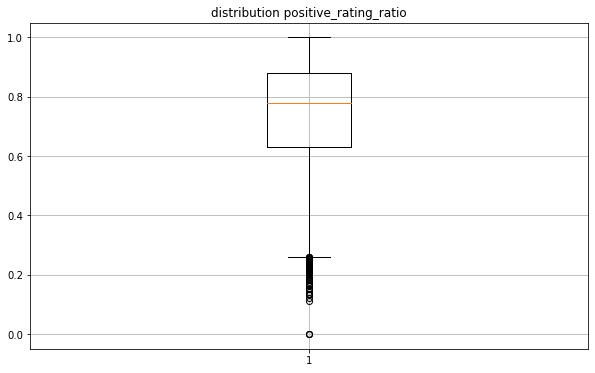

In [45]:
boxplot_population(df['positive_rating_ratio'], 'positive_rating_ratio')

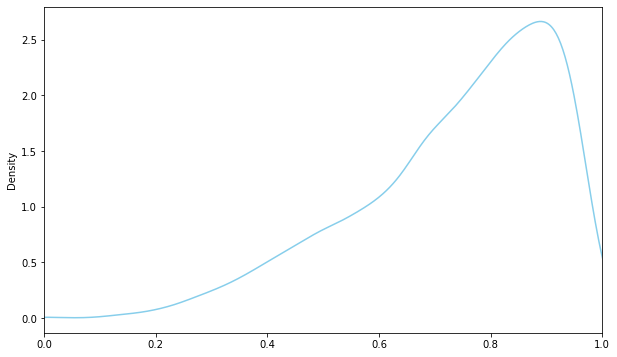

In [46]:
density_population(df, "positive_rating_ratio", 0, 1)

In [47]:
df['positive_rating_ratio'].describe()

count    6170.000000
mean        0.738248
std         0.177057
min         0.000000
25%         0.631660
50%         0.777778
75%         0.879539
max         1.000000
Name: positive_rating_ratio, dtype: float64

In [52]:
data = average_playtime_setting_outlier(df, 120, 100000)
data = median_playtime_setting_outlier(data, 120, 100000)
data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
9,220,Half-Life 2,2004-11-16,1,True,True,True,Valve,Valve,0,...,0.965601,691,402,10000000-20000000,7.19,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime


In [53]:
success_game_data = success_game_range(data, 0.7, 500)
success_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
9,220,Half-Life 2,2004-11-16,1,True,True,True,Valve,Valve,0,...,0.965601,691,402,10000000-20000000,7.19,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,977950,A Dance of Fire and Ice,2019-01-24,1,True,True,False,7th Beat Games,7th Beat Games;indienova,0,...,0.924204,180,230,100000-200000,2.09,indie,rhythm,music,difficult,great_soundtrack
6153,991780,Ã¦ÂÂ¢Ã§ÂÂµÃ§Â¬ÂÃ¨Â®Â°-1v5(Notes of Soul),2019-01-17,0,True,False,False,Ã¦ÂÂÃ¥Â¿Â«Ã§ÂÂ¹Ã¥Â·Â¥Ã¤Â½ÂÃ¥Â®Â¤,Ã§ÂÂµÃ¥Â¼ÂÃ¨Â°ÂÃ¦ÂÂ¥Ã§Â®Â¡Ã§ÂÂÃ¥Â±Â,0,...,0.878757,6332,6332,200000-500000,23.79,early_access,indie,action,adventure,horror
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime


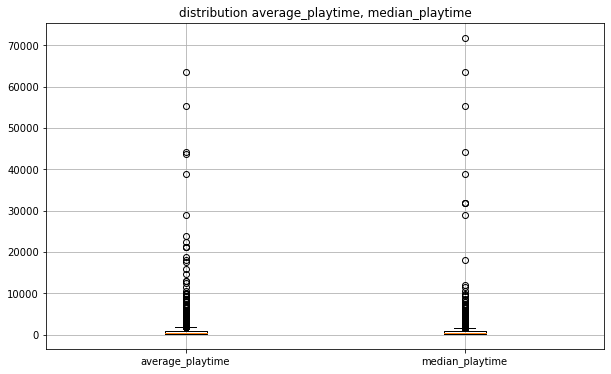

In [54]:
boxplot_population2(success_game_data, 'average_playtime', 'median_playtime')

In [55]:
cond1 = data['positive_rating_ratio'] < 0.7
cond2 = data['total_ratings'] < 500
fail_games_data = data[cond1 | cond2]

fail_games_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
31,1530,Multiwinia,2008-09-19,1,True,True,False,Introversion Software,Introversion Software,0,...,0.830700,121,224,500000-1000000,7.19,indie,rts,strategy,multiplayer,singleplayer
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,0.676630,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer
57,2800,X2: The Threat,2006-07-21,1,True,False,False,Egosoft,Egosoft,0,...,0.809160,732,732,200000-500000,4.99,space,strategy,simulation,sci_fi,open_world
58,2810,X3: Reunion,2006-07-21,1,True,True,True,Egosoft,Egosoft,0,...,0.713924,831,1232,200000-500000,9.99,space,simulation,strategy,sci_fi,sandbox
60,2840,X: Beyond the Frontier,2010-10-08,1,True,False,False,Egosoft,Egosoft,0,...,0.747368,648,648,200000-500000,3.49,simulation,space,strategy,sci_fi,singleplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6138,960090,Bloons TD 6,2018-12-17,1,True,False,False,Ninja Kiwi,Ninja Kiwi,0,...,0.672751,2819,2819,200000-500000,6.99,strategy,tower_defense,singleplayer,1980s,puzzle_platformer
6146,968790,DYNASTY WARRIORS 7: Xtreme Legends Definitive ...,2018-12-05,1,True,False,False,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",0,...,0.831683,592,592,0-20000,15.99,action,hack_and_slash,historical,1980s,puzzle_platformer
6152,984560,HEARTBEAT,2018-12-12,1,True,True,True,CHUMBOSOFT LLC,CHUMBOSOFT LLC,0,...,0.978378,1100,1100,0-20000,11.39,rpg,indie,pixel_graphics,rpgmaker,female_protagonist
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite


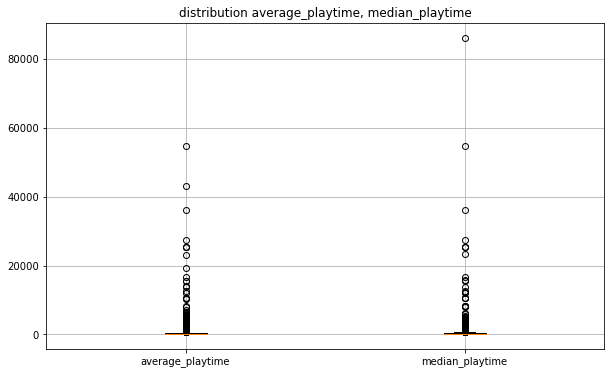

In [56]:
boxplot_population2(fail_games_data, 'average_playtime', 'median_playtime')

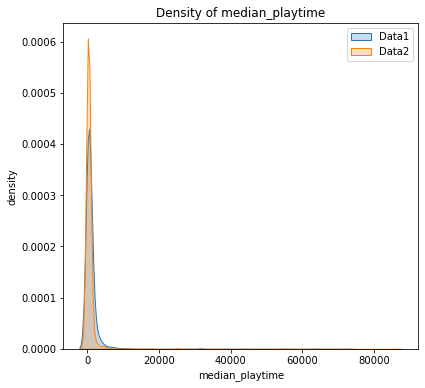

In [58]:
density_population3(success_game_data, fail_games_data, 'median_playtime')


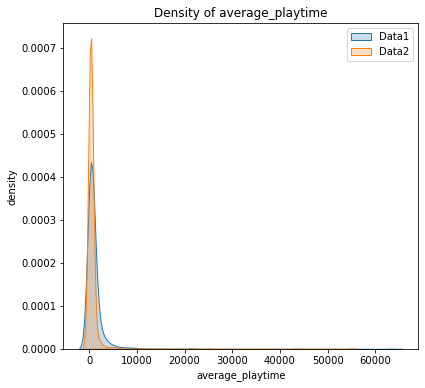

In [59]:
density_population3(success_game_data, fail_games_data, 'average_playtime')

In [57]:
# t-test 진행
alter_list = ['two-sided', 'less', 'greater']

for alter in alter_list:
    result = do_ttest1(success_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest1(fail_games_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_games_data, 'average_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_games_data, 'median_playtime', alter)

    print(result)

Ttest_indResult(statistic=0.9448933442371504, pvalue=0.34477519023383574)
Ttest_indResult(statistic=0.9448933442371504, pvalue=0.8276124048830822)
Ttest_indResult(statistic=0.9448933442371504, pvalue=0.17238759511691787)
----------------------
Ttest_indResult(statistic=-0.34336222816506834, pvalue=0.731342209096376)
Ttest_indResult(statistic=-0.34336222816506834, pvalue=0.365671104548188)
Ttest_indResult(statistic=-0.34336222816506834, pvalue=0.634328895451812)
----------------------
Ttest_indResult(statistic=5.57100758559184, pvalue=2.742194050443116e-08)
Ttest_indResult(statistic=5.57100758559184, pvalue=0.9999999862890298)
Ttest_indResult(statistic=5.57100758559184, pvalue=1.371097025221558e-08)
----------------------
Ttest_indResult(statistic=3.783462314290254, pvalue=0.00015724716379040505)
Ttest_indResult(statistic=3.783462314290254, pvalue=0.9999213764181049)
Ttest_indResult(statistic=3.783462314290254, pvalue=7.862358189520252e-05)


### 가설검정(t-test) 결과
- p-value가 모두 0.05보다 작기 때문에 귀무가설을 기각하여 대립가설을 채택한다.
    - 평균 게임 플레이 시간은 차이가 있다.
- 평균 게임 플레이 시간과 중간 게임 플레이시간의 차이가 있을까? 
    - p-value가 모두 0.05보다 크므로 차이가 없다.
- 시간이 매우 높은 게임들도 있어 그래프로 확인하기 쉽지 않음

## 기본적으로 설정한 것들(이상치, 성공한 게임의 기준) 바꿔가며 진행
### 1. 게임 플레이타임 시간을 20 ~ 600 범위로 지정해서 분석


In [61]:
data = average_playtime_setting_outlier(df, 20, 600)
data = median_playtime_setting_outlier(data, 20, 600)
data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
7,80,Counter-Strike: Condition Zero,2004-03-01,1,True,True,True,Valve,Valve,0,...,0.893871,427,43,10000000-20000000,7.19,action,fps,multiplayer,shooter,singleplayer
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite
6163,1012710,Endzeit,2019-04-03,1,True,False,False,RockyDev,RockyDev,0,...,0.000000,88,88,0-20000,7.19,action,violent,early_access,bullet_time,first_person
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,0.894057,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime


In [62]:
success_game_data = success_game_range(data, 0.7, 500)
success_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
7,80,Counter-Strike: Condition Zero,2004-03-01,1,True,True,True,Valve,Valve,0,...,0.893871,427,43,10000000-20000000,7.19,action,fps,multiplayer,shooter,singleplayer
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,967050,Pacify,2019-02-22,1,True,True,False,Shawn Hitchcock,SKH Apps,0,...,0.876658,117,150,50000-100000,3.99,horror,multiplayer,co_op,action,adventure
6144,967250,DOKA 2 KISHKI EDITION,2018-11-05,1,True,False,False,Agafonoff,Agafonoff,0,...,0.873978,160,160,100000-200000,0.79,gore,violent,memes,action,indie
6151,977950,A Dance of Fire and Ice,2019-01-24,1,True,True,False,7th Beat Games,7th Beat Games;indienova,0,...,0.924204,180,230,100000-200000,2.09,indie,rhythm,music,difficult,great_soundtrack
6154,992300,Ã¥ÂÂÃ¨Â¡ÂÃ¥ÂÂ° Bloody Spell,2019-01-15,1,True,False,False,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,0,...,0.802156,36,36,50000-100000,15.49,action,indie,early_access,rpg,violent


In [63]:
fail_game_data = fail_game_range(data, 0.7, 500)
fail_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
31,1530,Multiwinia,2008-09-19,1,True,True,False,Introversion Software,Introversion Software,0,...,0.830700,121,224,500000-1000000,7.19,indie,rts,strategy,multiplayer,singleplayer
33,1690,Space Empires V,2006-10-16,1,True,False,False,Malfador Machinations,Strategy First,0,...,0.692029,35,35,50000-100000,10.99,strategy,4x,space,sci_fi,turn_based
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,0.676630,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer
47,2330,QUAKE II Mission Pack: The Reckoning,2007-08-03,1,True,False,False,Xatrix Entertainment,id Software,0,...,0.844156,32,32,200000-500000,2.49,action,fps,shooter,classic,realistic
49,2360,HeXen: Beyond Heretic,2007-08-03,1,True,False,False,Raven Software,id Software,0,...,0.905455,50,50,200000-500000,2.99,action,fps,classic,fantasy,dark_fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,992740,Ã§Â¥ÂÃ©Â¢Â¨ Inorikaze,2019-02-13,0,True,False,False,Twilight -Ã¦ÂÂ¥Ã¦ÂÂÃ¤Â¹ÂÃ¥Â¢Â-;Ã¨Â§ÂÃ¨Â±...,Ã¨Â§ÂÃ¨Â±Â¡Ã¨ÂÂÃ¥ÂÂ Astrolabe Draft,0,...,1.000000,75,75,0-20000,8.29,casual,adventure,indie,visual_novel,anime
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite
6163,1012710,Endzeit,2019-04-03,1,True,False,False,RockyDev,RockyDev,0,...,0.000000,88,88,0-20000,7.19,action,violent,early_access,bullet_time,first_person
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,0.894057,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve


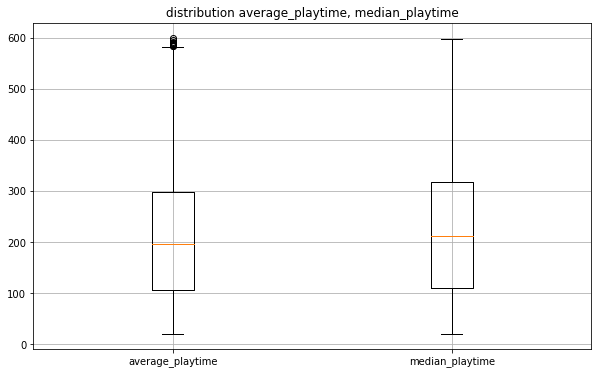

In [65]:
boxplot_population2(success_game_data, 'average_playtime', 'median_playtime')

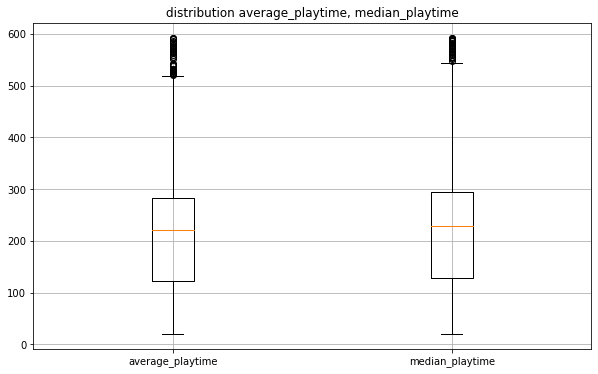

In [66]:
boxplot_population2(fail_game_data, 'average_playtime', 'median_playtime')

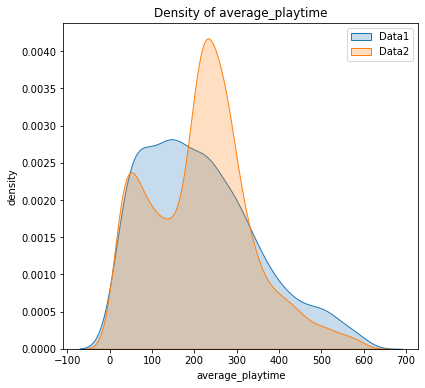

In [67]:
density_population3(success_game_data, fail_game_data, 'average_playtime')

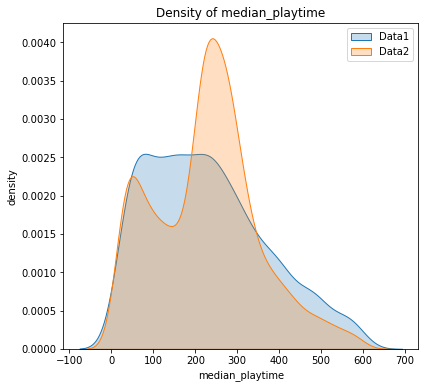

In [68]:
density_population3(success_game_data, fail_game_data, 'median_playtime')

In [69]:
# t-test 진행
alter_list = ['two-sided', 'less', 'greater']

for alter in alter_list:
    result = do_ttest1(success_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest1(fail_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'average_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'median_playtime', alter)

    print(result)

Ttest_indResult(statistic=-2.730694557148904, pvalue=0.006353946945681749)
Ttest_indResult(statistic=-2.730694557148904, pvalue=0.0031769734728408746)
Ttest_indResult(statistic=-2.730694557148904, pvalue=0.9968230265271592)
----------------------
Ttest_indResult(statistic=-3.0336265961513713, pvalue=0.002428036769696362)
Ttest_indResult(statistic=-3.0336265961513713, pvalue=0.001214018384848181)
Ttest_indResult(statistic=-3.0336265961513713, pvalue=0.9987859816151518)
----------------------
Ttest_indResult(statistic=-0.4002020901806848, pvalue=0.6890345788555629)
Ttest_indResult(statistic=-0.4002020901806848, pvalue=0.3445172894277814)
Ttest_indResult(statistic=-0.4002020901806848, pvalue=0.6554827105722185)
----------------------
Ttest_indResult(statistic=0.32120771437739243, pvalue=0.7480743458388417)
Ttest_indResult(statistic=0.32120771437739243, pvalue=0.625962827080579)
Ttest_indResult(statistic=0.32120771437739243, pvalue=0.37403717291942085)


### 가설검정(t-test) 결과
- 범위를 20 ~ 600으로 한 결과, 모두 p-value가 0.05보다 크므로 차이가 없다는 결론이 나온다.

### 2. 범위를 30 ~ 100000 으로 설정해서 진행

In [77]:
data = average_playtime_setting_outlier(df, 30, 100000)
data = median_playtime_setting_outlier(df, 30, 100000)
data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime
6163,1012710,Endzeit,2019-04-03,1,True,False,False,RockyDev,RockyDev,0,...,0.000000,88,88,0-20000,7.19,action,violent,early_access,bullet_time,first_person
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,0.894057,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime


In [80]:
success_game_data = success_game_range(data, 0.7, 500)
fail_game_data = fail_game_range(data, 0.7, 500)

display(success_game_data, fail_game_data)

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6153,991780,Ã¦ÂÂ¢Ã§ÂÂµÃ§Â¬ÂÃ¨Â®Â°-1v5(Notes of Soul),2019-01-17,0,True,False,False,Ã¦ÂÂÃ¥Â¿Â«Ã§ÂÂ¹Ã¥Â·Â¥Ã¤Â½ÂÃ¥Â®Â¤,Ã§ÂÂµÃ¥Â¼ÂÃ¨Â°ÂÃ¦ÂÂ¥Ã§Â®Â¡Ã§ÂÂÃ¥Â±Â,0,...,0.878757,6332,6332,200000-500000,23.79,early_access,indie,action,adventure,horror
6154,992300,Ã¥ÂÂÃ¨Â¡ÂÃ¥ÂÂ° Bloody Spell,2019-01-15,1,True,False,False,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,0,...,0.802156,36,36,50000-100000,15.49,action,indie,early_access,rpg,violent
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime


,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
31,1530,Multiwinia,2008-09-19,1,True,True,False,Introversion Software,Introversion Software,0,...,0.830700,121,224,500000-1000000,7.19,indie,rts,strategy,multiplayer,singleplayer
33,1690,Space Empires V,2006-10-16,1,True,False,False,Malfador Machinations,Strategy First,0,...,0.692029,35,35,50000-100000,10.99,strategy,4x,space,sci_fi,turn_based
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,0.676630,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer
47,2330,QUAKE II Mission Pack: The Reckoning,2007-08-03,1,True,False,False,Xatrix Entertainment,id Software,0,...,0.844156,32,32,200000-500000,2.49,action,fps,shooter,classic,realistic
49,2360,HeXen: Beyond Heretic,2007-08-03,1,True,False,False,Raven Software,id Software,0,...,0.905455,50,50,200000-500000,2.99,action,fps,classic,fantasy,dark_fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,992740,Ã§Â¥ÂÃ©Â¢Â¨ Inorikaze,2019-02-13,0,True,False,False,Twilight -Ã¦ÂÂ¥Ã¦ÂÂÃ¤Â¹ÂÃ¥Â¢Â-;Ã¨Â§ÂÃ¨Â±...,Ã¨Â§ÂÃ¨Â±Â¡Ã¨ÂÂÃ¥ÂÂ Astrolabe Draft,0,...,1.000000,75,75,0-20000,8.29,casual,adventure,indie,visual_novel,anime
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite
6163,1012710,Endzeit,2019-04-03,1,True,False,False,RockyDev,RockyDev,0,...,0.000000,88,88,0-20000,7.19,action,violent,early_access,bullet_time,first_person
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,0.894057,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve


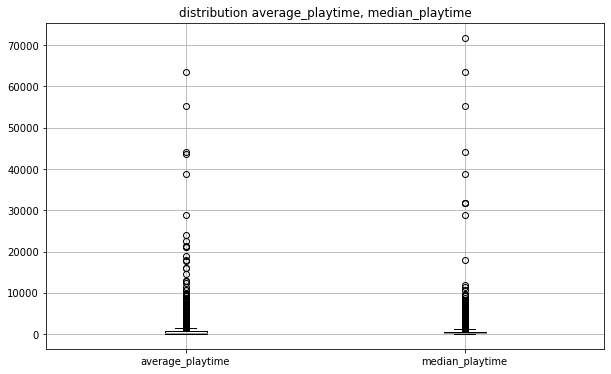

In [81]:
boxplot_population2(success_game_data, 'average_playtime', 'median_playtime')

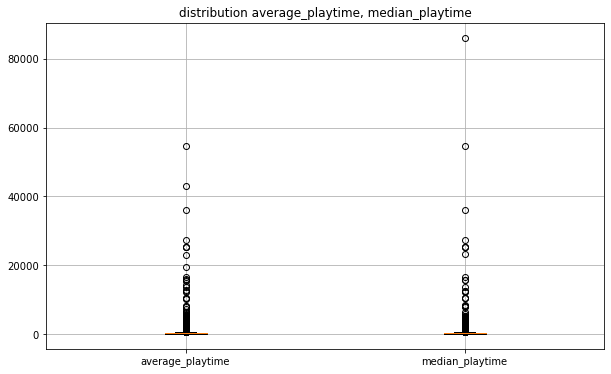

In [82]:
boxplot_population2(fail_game_data, 'average_playtime', 'median_playtime')

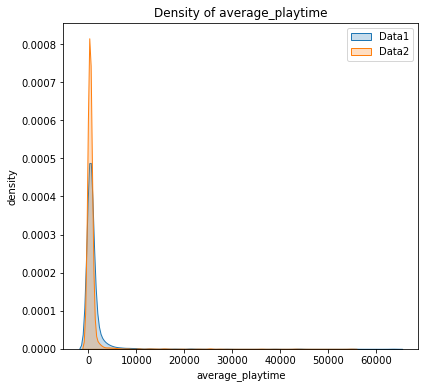

In [83]:
density_population3(success_game_data, fail_game_data, 'average_playtime')

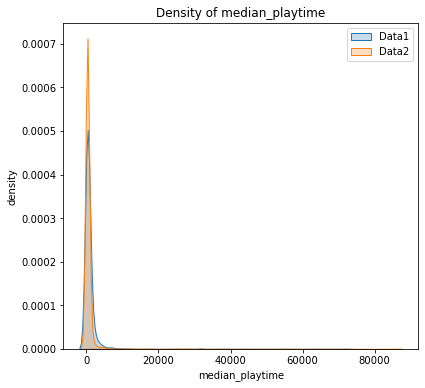

In [84]:
density_population3(success_game_data, fail_game_data, 'median_playtime')

In [85]:
# t-test 진행
alter_list = ['two-sided', 'less', 'greater']

for alter in alter_list:
    result = do_ttest1(success_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest1(fail_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'average_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'median_playtime', alter)

    print(result)

Ttest_indResult(statistic=1.3380588630677759, pvalue=0.18094265149490185)
Ttest_indResult(statistic=1.3380588630677759, pvalue=0.909528674252549)
Ttest_indResult(statistic=1.3380588630677759, pvalue=0.09047132574745093)
----------------------
Ttest_indResult(statistic=-0.05455454355922676, pvalue=0.9564953121679705)
Ttest_indResult(statistic=-0.05455454355922676, pvalue=0.47824765608398523)
Ttest_indResult(statistic=-0.05455454355922676, pvalue=0.5217523439160148)
----------------------
Ttest_indResult(statistic=5.6246738195901855, pvalue=1.983492717166107e-08)
Ttest_indResult(statistic=5.6246738195901855, pvalue=0.9999999900825365)
Ttest_indResult(statistic=5.6246738195901855, pvalue=9.917463585830534e-09)
----------------------
Ttest_indResult(statistic=3.691973635348054, pvalue=0.00022520114868309143)
Ttest_indResult(statistic=3.691973635348054, pvalue=0.9998873994256585)
Ttest_indResult(statistic=3.691973635348054, pvalue=0.00011260057434154572)


### 가설검정(t-test) 결과
- 범위를 30 ~ 100000으로 한 결과, 모두 p-value가 0.05보다 작으므로 유의미한 차이가 있다는 결론이 나옴
- 하지만 큰 값들 때문에 시각화에 어려움

### 3. 성공한 게임의 기준을 다르게 설정해보자.
    - 스팀에서 말하는 리뷰의 긍정이 80%이므로 80%와 리뷰의 수 500개로 설정
    - 이상치는 처음에 했던 범위(120, 100000) 그대로 적용

In [86]:
data = average_playtime_setting_outlier(df, 120, 100000)
data = median_playtime_setting_outlier(data, 120, 100000)
data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
9,220,Half-Life 2,2004-11-16,1,True,True,True,Valve,Valve,0,...,0.965601,691,402,10000000-20000000,7.19,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime


In [88]:
success_game_data = success_game_range(data, 0.8, 500)
fail_game_data = fail_game_range(data, 0.8, 500)

display(success_game_data, fail_game_data)

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
9,220,Half-Life 2,2004-11-16,1,True,True,True,Valve,Valve,0,...,0.965601,691,402,10000000-20000000,7.19,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,977950,A Dance of Fire and Ice,2019-01-24,1,True,True,False,7th Beat Games,7th Beat Games;indienova,0,...,0.924204,180,230,100000-200000,2.09,indie,rhythm,music,difficult,great_soundtrack
6153,991780,Ã¦ÂÂ¢Ã§ÂÂµÃ§Â¬ÂÃ¨Â®Â°-1v5(Notes of Soul),2019-01-17,0,True,False,False,Ã¦ÂÂÃ¥Â¿Â«Ã§ÂÂ¹Ã¥Â·Â¥Ã¤Â½ÂÃ¥Â®Â¤,Ã§ÂÂµÃ¥Â¼ÂÃ¨Â°ÂÃ¦ÂÂ¥Ã§Â®Â¡Ã§ÂÂÃ¥Â±Â,0,...,0.878757,6332,6332,200000-500000,23.79,early_access,indie,action,adventure,horror
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime


,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
11,280,Half-Life: Source,2004-06-01,1,True,True,True,Valve,Valve,0,...,0.781535,190,214,2000000-5000000,0.00,fps,action,sci_fi,classic,singleplayer
28,1500,Darwinia,2005-07-14,1,True,True,True,Introversion Software,Introversion Software,0,...,0.749206,182,273,500000-1000000,7.19,strategy,indie,rts,singleplayer,retro
31,1530,Multiwinia,2008-09-19,1,True,True,False,Introversion Software,Introversion Software,0,...,0.830700,121,224,500000-1000000,7.19,indie,rts,strategy,multiplayer,singleplayer
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,0.676630,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer
37,1930,Two Worlds Epic Edition,2009-04-30,1,True,True,True,Reality Pump Studios,Topware Interactive,0,...,0.715710,484,422,1000000-2000000,6.99,rpg,open_world,fantasy,third_person,multiplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6138,960090,Bloons TD 6,2018-12-17,1,True,False,False,Ninja Kiwi,Ninja Kiwi,0,...,0.672751,2819,2819,200000-500000,6.99,strategy,tower_defense,singleplayer,1980s,puzzle_platformer
6146,968790,DYNASTY WARRIORS 7: Xtreme Legends Definitive ...,2018-12-05,1,True,False,False,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",0,...,0.831683,592,592,0-20000,15.99,action,hack_and_slash,historical,1980s,puzzle_platformer
6152,984560,HEARTBEAT,2018-12-12,1,True,True,True,CHUMBOSOFT LLC,CHUMBOSOFT LLC,0,...,0.978378,1100,1100,0-20000,11.39,rpg,indie,pixel_graphics,rpgmaker,female_protagonist
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite


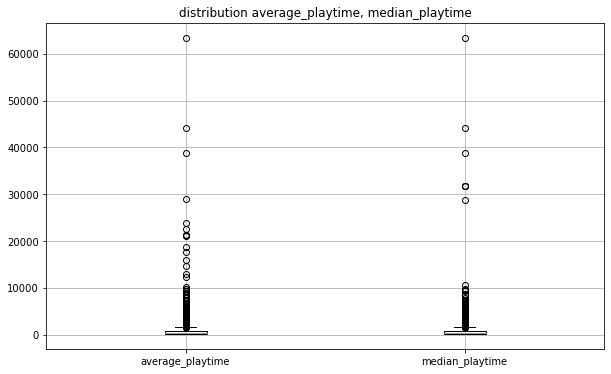

In [90]:
boxplot_population2(success_game_data, 'average_playtime', 'median_playtime')

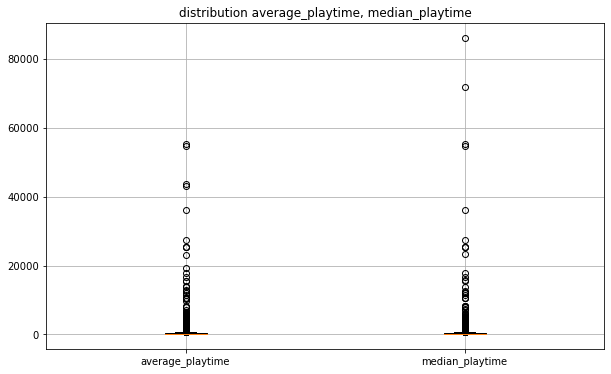

In [91]:
boxplot_population2(fail_game_data, 'average_playtime', 'median_playtime')

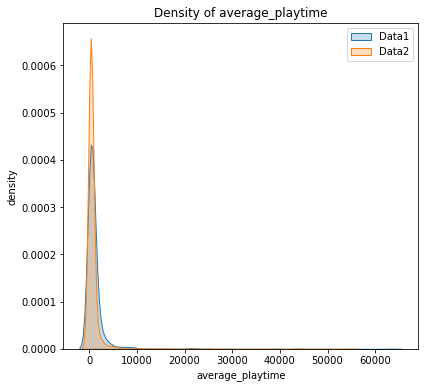

In [92]:
density_population3(success_game_data, fail_game_data, 'average_playtime')

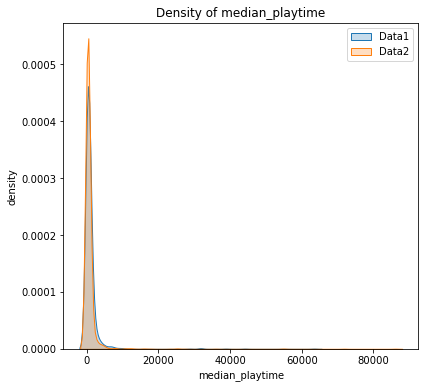

In [93]:
density_population3(success_game_data, fail_game_data, 'median_playtime')

In [94]:
# t-test 진행
alter_list = ['two-sided', 'less', 'greater']

for alter in alter_list:
    result = do_ttest1(success_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest1(fail_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'average_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'median_playtime', alter)

    print(result)

Ttest_indResult(statistic=1.0632134337533166, pvalue=0.2877772687268991)
Ttest_indResult(statistic=1.0632134337533166, pvalue=0.8561113656365504)
Ttest_indResult(statistic=1.0632134337533166, pvalue=0.14388863436344956)
----------------------
Ttest_indResult(statistic=-0.18553570386264318, pvalue=0.8528159588922676)
Ttest_indResult(statistic=-0.18553570386264318, pvalue=0.4264079794461338)
Ttest_indResult(statistic=-0.18553570386264318, pvalue=0.5735920205538662)
----------------------
Ttest_indResult(statistic=3.791635736609824, pvalue=0.00015338324870190664)
Ttest_indResult(statistic=3.791635736609824, pvalue=0.999923308375649)
Ttest_indResult(statistic=3.791635736609824, pvalue=7.669162435095332e-05)
----------------------
Ttest_indResult(statistic=2.3094681577064753, pvalue=0.020988056990197863)
Ttest_indResult(statistic=2.3094681577064753, pvalue=0.989505971504901)
Ttest_indResult(statistic=2.3094681577064753, pvalue=0.010494028495098931)


### 가설검정(t-test) 결과
- 성공 비율을 80%로 한 결과, 모두 p-value가 0.05보다 작으므로 유의미한 차이가 있다는 결론이 나옴
- 하지만 큰 값들 때문에 시각화에 어려움

### 4. 성공한 게임의 기준은 그대로 하되, 이상치 범위를 다르게 설정해보자.
    - 성공한 게임의 기준을 80%와 리뷰의 수 500개로 설정
    - 이상치의 기준을 (120, 20000) 으로 잡음

In [97]:
data = average_playtime_setting_outlier(df, 120, 20000)
data = median_playtime_setting_outlier(data, 120, 20000)
data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
9,220,Half-Life 2,2004-11-16,1,True,True,True,Valve,Valve,0,...,0.965601,691,402,10000000-20000000,7.19,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime


In [100]:
success_game_data = success_game_range(data, 0.8, 500)
fail_game_data = fail_game_range(data, 0.8, 500)

display(success_game_data, fail_game_data)

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
0,10,Counter-Strike,2000-11-01,1,True,True,True,Valve,Valve,0,...,0.973888,17612,317,10000000-20000000,7.19,action,fps,multiplayer,shooter,classic
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
9,220,Half-Life 2,2004-11-16,1,True,True,True,Valve,Valve,0,...,0.965601,691,402,10000000-20000000,7.19,fps,action,sci_fi,singleplayer,classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,977950,A Dance of Fire and Ice,2019-01-24,1,True,True,False,7th Beat Games,7th Beat Games;indienova,0,...,0.924204,180,230,100000-200000,2.09,indie,rhythm,music,difficult,great_soundtrack
6153,991780,Ã¦ÂÂ¢Ã§ÂÂµÃ§Â¬ÂÃ¨Â®Â°-1v5(Notes of Soul),2019-01-17,0,True,False,False,Ã¦ÂÂÃ¥Â¿Â«Ã§ÂÂ¹Ã¥Â·Â¥Ã¤Â½ÂÃ¥Â®Â¤,Ã§ÂÂµÃ¥Â¼ÂÃ¨Â°ÂÃ¦ÂÂ¥Ã§Â®Â¡Ã§ÂÂÃ¥Â±Â,0,...,0.878757,6332,6332,200000-500000,23.79,early_access,indie,action,adventure,horror
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime


,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
11,280,Half-Life: Source,2004-06-01,1,True,True,True,Valve,Valve,0,...,0.781535,190,214,2000000-5000000,0.00,fps,action,sci_fi,classic,singleplayer
28,1500,Darwinia,2005-07-14,1,True,True,True,Introversion Software,Introversion Software,0,...,0.749206,182,273,500000-1000000,7.19,strategy,indie,rts,singleplayer,retro
31,1530,Multiwinia,2008-09-19,1,True,True,False,Introversion Software,Introversion Software,0,...,0.830700,121,224,500000-1000000,7.19,indie,rts,strategy,multiplayer,singleplayer
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,0.676630,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer
37,1930,Two Worlds Epic Edition,2009-04-30,1,True,True,True,Reality Pump Studios,Topware Interactive,0,...,0.715710,484,422,1000000-2000000,6.99,rpg,open_world,fantasy,third_person,multiplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6138,960090,Bloons TD 6,2018-12-17,1,True,False,False,Ninja Kiwi,Ninja Kiwi,0,...,0.672751,2819,2819,200000-500000,6.99,strategy,tower_defense,singleplayer,1980s,puzzle_platformer
6146,968790,DYNASTY WARRIORS 7: Xtreme Legends Definitive ...,2018-12-05,1,True,False,False,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",0,...,0.831683,592,592,0-20000,15.99,action,hack_and_slash,historical,1980s,puzzle_platformer
6152,984560,HEARTBEAT,2018-12-12,1,True,True,True,CHUMBOSOFT LLC,CHUMBOSOFT LLC,0,...,0.978378,1100,1100,0-20000,11.39,rpg,indie,pixel_graphics,rpgmaker,female_protagonist
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite


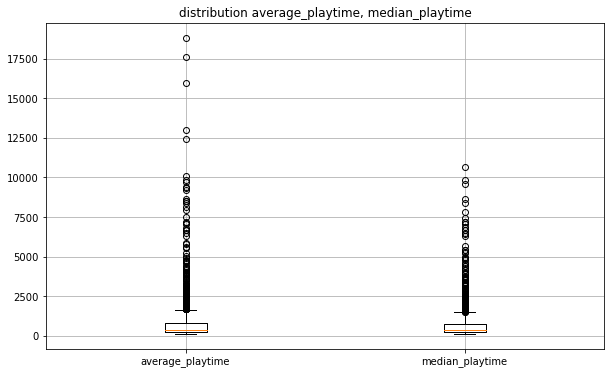

In [101]:
boxplot_population2(success_game_data, 'average_playtime', 'median_playtime')

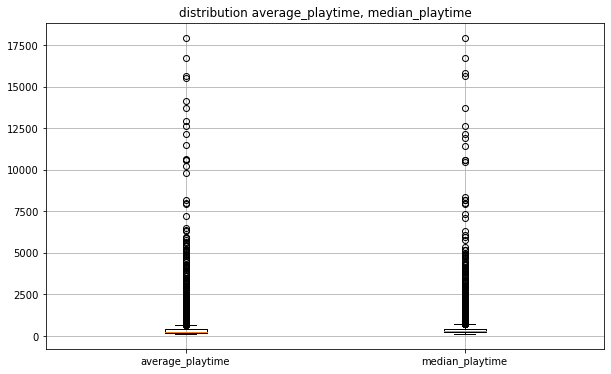

In [102]:
boxplot_population2(fail_game_data, 'average_playtime', 'median_playtime')

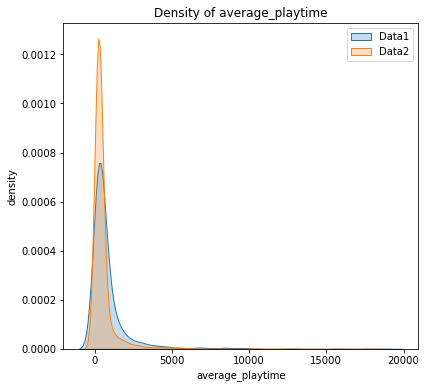

In [103]:
density_population3(success_game_data, fail_game_data, 'average_playtime')

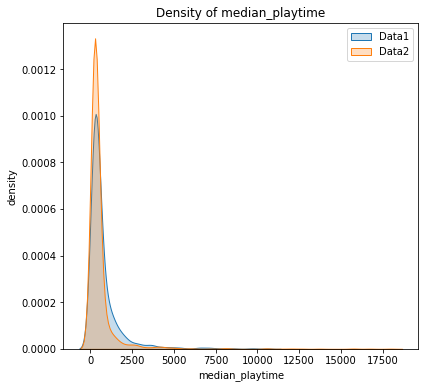

In [104]:
density_population3(success_game_data, fail_game_data, 'median_playtime')

In [105]:
# t-test 진행
alter_list = ['two-sided', 'less', 'greater']

for alter in alter_list:
    result = do_ttest1(success_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest1(fail_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'average_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'median_playtime', alter)

    print(result)

Ttest_indResult(statistic=2.2639229607601608, pvalue=0.023664466434375742)
Ttest_indResult(statistic=2.2639229607601608, pvalue=0.9881677667828122)
Ttest_indResult(statistic=2.2639229607601608, pvalue=0.011832233217187871)
----------------------
Ttest_indResult(statistic=0.29156155290545116, pvalue=0.7706329706280528)
Ttest_indResult(statistic=0.29156155290545116, pvalue=0.6146835146859736)
Ttest_indResult(statistic=0.29156155290545116, pvalue=0.3853164853140264)
----------------------
Ttest_indResult(statistic=6.192898052814913, pvalue=6.986910900200997e-10)
Ttest_indResult(statistic=6.192898052814913, pvalue=0.9999999996506544)
Ttest_indResult(statistic=6.192898052814913, pvalue=3.493455450100498e-10)
----------------------
Ttest_indResult(statistic=5.1600650559749415, pvalue=2.6343076967774124e-07)
Ttest_indResult(statistic=5.1600650559749415, pvalue=0.9999998682846152)
Ttest_indResult(statistic=5.1600650559749415, pvalue=1.3171538483887062e-07)


### 가설검정(t-test) 결과
- 범위를 축소시켜도 모두 p-value가 0.05보다 작으므로 유의미한 차이가 있다는 결론이 나옴
- 시각화가 어느 정도 나아졌지만 여전히 큰 값들 때문에 시각화에 어려움이 있다.

### 5. 성공한 게임의 기준은 그대로 하되, 다시 한 번 이상치 범위를 다르게 설정해보자. 이번에는 범위를 크게 줄여보자.
    - 성공한 게임의 기준을 80%와 리뷰의 수 500개로 설정
    - 이상치의 기준을 (120, 2500) 으로 잡음

In [116]:
data = average_playtime_setting_outlier(df, 120, 2500)
data = median_playtime_setting_outlier(data, 120, 2500)
data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
9,220,Half-Life 2,2004-11-16,1,True,True,True,Valve,Valve,0,...,0.965601,691,402,10000000-20000000,7.19,fps,action,sci_fi,singleplayer,classic
11,280,Half-Life: Source,2004-06-01,1,True,True,True,Valve,Valve,0,...,0.781535,190,214,2000000-5000000,0.00,fps,action,sci_fi,classic,singleplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime


In [117]:
success_game_data = success_game_range(data, 0.8, 500)
fail_game_data = fail_game_range(data, 0.8, 500)

display(success_game_data, fail_game_data)

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
8,130,Half-Life: Blue Shift,2001-06-01,1,True,True,True,Gearbox Software,Valve,0,...,0.900990,361,205,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,shooter
9,220,Half-Life 2,2004-11-16,1,True,True,True,Valve,Valve,0,...,0.965601,691,402,10000000-20000000,7.19,fps,action,sci_fi,singleplayer,classic
12,300,Day of Defeat: Source,2010-07-12,1,True,True,True,Valve,Valve,0,...,0.896572,1356,134,5000000-10000000,7.19,fps,world_war_ii,multiplayer,action,shooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6144,967250,DOKA 2 KISHKI EDITION,2018-11-05,1,True,False,False,Agafonoff,Agafonoff,0,...,0.873978,160,160,100000-200000,0.79,gore,violent,memes,action,indie
6151,977950,A Dance of Fire and Ice,2019-01-24,1,True,True,False,7th Beat Games,7th Beat Games;indienova,0,...,0.924204,180,230,100000-200000,2.09,indie,rhythm,music,difficult,great_soundtrack
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime


,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
11,280,Half-Life: Source,2004-06-01,1,True,True,True,Valve,Valve,0,...,0.781535,190,214,2000000-5000000,0.00,fps,action,sci_fi,classic,singleplayer
28,1500,Darwinia,2005-07-14,1,True,True,True,Introversion Software,Introversion Software,0,...,0.749206,182,273,500000-1000000,7.19,strategy,indie,rts,singleplayer,retro
31,1530,Multiwinia,2008-09-19,1,True,True,False,Introversion Software,Introversion Software,0,...,0.830700,121,224,500000-1000000,7.19,indie,rts,strategy,multiplayer,singleplayer
36,1900,Earth 2160,2006-04-01,1,True,True,True,Reality Pump Studios,Topware Interactive;ACE,0,...,0.676630,405,414,1000000-2000000,3.99,strategy,rts,sci_fi,singleplayer,multiplayer
37,1930,Two Worlds Epic Edition,2009-04-30,1,True,True,True,Reality Pump Studios,Topware Interactive,0,...,0.715710,484,422,1000000-2000000,6.99,rpg,open_world,fantasy,third_person,multiplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,939960,Far CryÃÂ® New Dawn,2019-02-15,1,True,False,False,Ubisoft Montreal;Ubisoft Kiev;Ubisoft Shanghai,Ubisoft,0,...,0.703524,1597,1827,100000-200000,37.99,open_world,action,fps,multiplayer,post_apocalyptic
6146,968790,DYNASTY WARRIORS 7: Xtreme Legends Definitive ...,2018-12-05,1,True,False,False,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",0,...,0.831683,592,592,0-20000,15.99,action,hack_and_slash,historical,1980s,puzzle_platformer
6152,984560,HEARTBEAT,2018-12-12,1,True,True,True,CHUMBOSOFT LLC,CHUMBOSOFT LLC,0,...,0.978378,1100,1100,0-20000,11.39,rpg,indie,pixel_graphics,rpgmaker,female_protagonist
6156,994220,NEOVERSE,2019-01-09,1,True,True,False,Tinogames Inc.,Tinogames Inc.,0,...,0.811321,162,162,0-20000,13.99,strategy,early_access,indie,card_game,rogue_lite


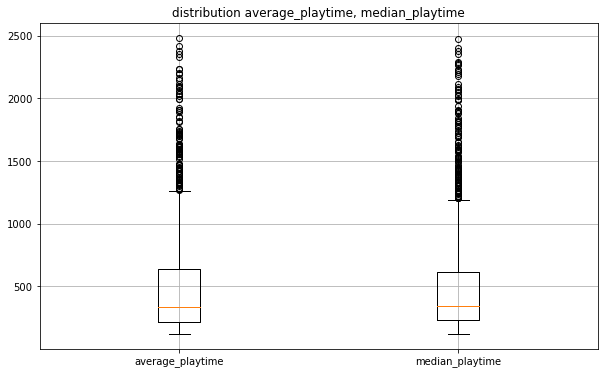

In [118]:
boxplot_population2(success_game_data, 'average_playtime', 'median_playtime')

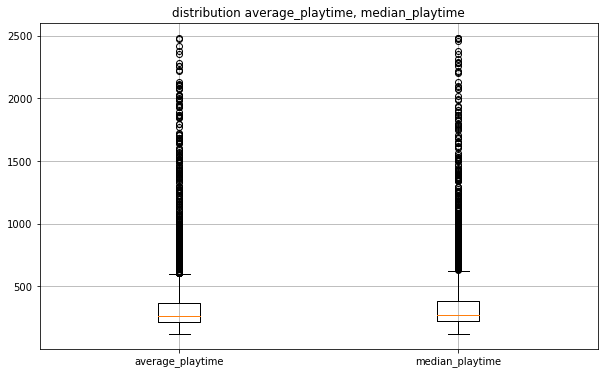

In [119]:
boxplot_population2(fail_game_data, 'average_playtime', 'median_playtime')

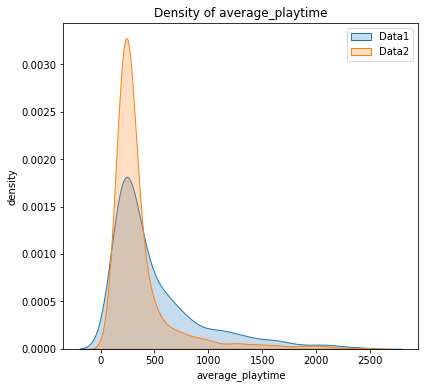

In [120]:
density_population3(success_game_data, fail_game_data, 'average_playtime')

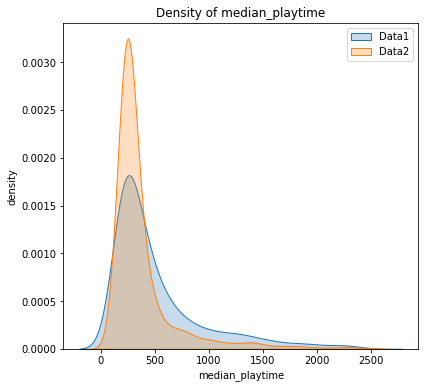

In [121]:
density_population3(success_game_data, fail_game_data, 'median_playtime')

In [122]:
# t-test 진행
alter_list = ['two-sided', 'less', 'greater']

for alter in alter_list:
    result = do_ttest1(success_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest1(fail_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'average_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'median_playtime', alter)

    print(result)

Ttest_indResult(statistic=-0.37929801663356943, pvalue=0.7044982289707786)
Ttest_indResult(statistic=-0.37929801663356943, pvalue=0.3522491144853893)
Ttest_indResult(statistic=-0.37929801663356943, pvalue=0.6477508855146108)
----------------------
Ttest_indResult(statistic=-1.3692679868132163, pvalue=0.17097427589536984)
Ttest_indResult(statistic=-1.3692679868132163, pvalue=0.08548713794768492)
Ttest_indResult(statistic=-1.3692679868132163, pvalue=0.9145128620523151)
----------------------
Ttest_indResult(statistic=9.900227025281549, pvalue=1.3509146869537659e-22)
Ttest_indResult(statistic=9.900227025281549, pvalue=1.0)
Ttest_indResult(statistic=9.900227025281549, pvalue=6.754573434768829e-23)
----------------------
Ttest_indResult(statistic=9.453720602935919, pvalue=8.84421947288228e-21)
Ttest_indResult(statistic=9.453720602935919, pvalue=1.0)
Ttest_indResult(statistic=9.453720602935919, pvalue=4.42210973644114e-21)


### 가설검정(t-test) 결과
- 범위를 축소시켜도 모두 p-value가 0.05보다 작으므로 유의미한 차이가 있다는 결론이 나옴
- 시각화가 어느 정도 나아졌다.
- 긍정 비율을 80%까지 올리니 당연한 결과가 나오는 것 같다.

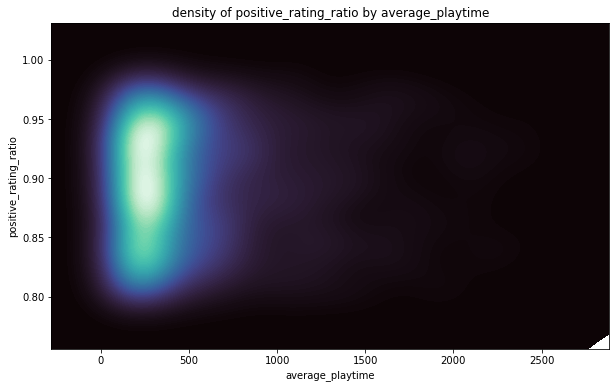

In [125]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=success_game_data, x='average_playtime', y='positive_rating_ratio', fill=True, thresh=0, levels=100, cmap="mako")
plt.title('density of positive_rating_ratio by average_playtime')
plt.xlabel('average_playtime')
plt.ylabel('positive_rating_ratio')
plt.show()

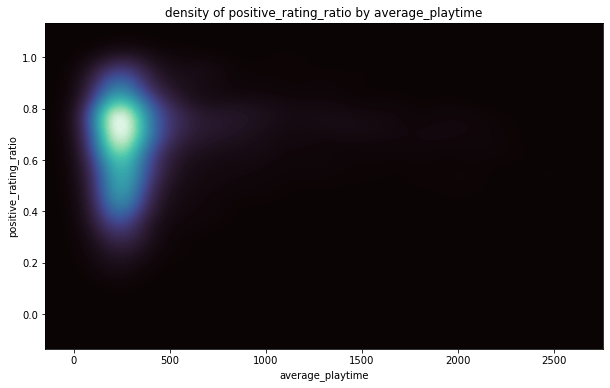

In [126]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fail_game_data, x='average_playtime', y='positive_rating_ratio', fill=True, thresh=0, levels=100, cmap="mako")
plt.title('density of positive_rating_ratio by average_playtime')
plt.xlabel('average_playtime')
plt.ylabel('positive_rating_ratio')
plt.show()

## 성공한 게임은 일반적으로 평균 플레이시간, 중간 플레이시간이 높았다. 
### 그렇다면 플레이 시간이 높은 것은 유저의 만족도가 높은 것 아닐까?
#### 새로운 가설 : 성공한 게임이 플레이 시간이 높다면 유저의 만족도가 높을 것이다.
    - 성공의 기준은 긍정 리뷰 비율 0.7, 리뷰 개수 500개로 설정한다.

### 갑자기 생각난 내용
- 내가 실패한 게임에 대해 정의를 잘못하고 있는 것은 아닐까?
    - 단순히 긍정 리뷰가 0.7이 안되거나 리뷰 개수가 500개 이하인 것들은 아직 지켜봐야하는 게임이지 않을까?
    - 리뷰가 0.7이 안되더라도 리뷰의 개수가 500개가 되지 않았다면 봐줘야하지 않을까?
    - 또는 실패의 기준 리뷰가 0.6대여도 복합적으로 나와 부정적과 긍정적이 섞인 경우도 많다.
   
- 따라서, 긍정 리뷰가 0.5를 넘지 못한다면 실패한 게임으로 간주하고 진행해보자.

- 혹은 "실패한 게임의 리뷰 개수는 확실히 적은가?" 로 새로운 가설을 세워볼까?
    1. 실패한 게임 기준을 0.5 이하로 잡기, 대신 리뷰수 100개 넘는 것들만 가져오기
    2. 실패한 게임 기준을 0.4 이하로 잡기
    
- 추가로 성공도, 실패도 하지 않은 게임들은 어떻게 해야 성공 게임이 되는지, 실패한 게임이 되지 않기 위해 무엇을 해야 할지도 생각해보기

### 평균 플레이 시간의 분포가 앞의 부분(1000 미만)에 대부분 분포되어 있어 1000분 이상인 데이터는 모두 제거

In [152]:
data = average_playtime_setting_outlier(df, 30, 1000)
data = median_playtime_setting_outlier(data, 30, 1000)
data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
7,80,Counter-Strike: Condition Zero,2004-03-01,1,True,True,True,Valve,Valve,0,...,0.893871,427,43,10000000-20000000,7.19,action,fps,multiplayer,shooter,singleplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime
6163,1012710,Endzeit,2019-04-03,1,True,False,False,RockyDev,RockyDev,0,...,0.000000,88,88,0-20000,7.19,action,violent,early_access,bullet_time,first_person
6166,1020820,KumaKuma Manga Editor,2019-02-27,1,True,False,False,KumaKumaManga,SakuraGame,0,...,0.894057,43,43,20000-50000,4.79,design_&_illustration,web_publishing,animation_&_modeling,anime,pve
6167,1031480,Ã¦ÂÂ±Ã¦ÂÂ¹Ã¥Â¹ÂÃ¨ÂÂ¯Ã§Â¥Â­ Ã¦ÂÂ¥Ã©ÂÂªÃ§Â...,2019-03-18,1,True,False,False,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,Ã¤Â¸ÂÃ¦ÂÂ¹Ã¥Â¹ÂÃ¥ÂÂÃ§Â¥Â­Ã¥ÂÂ¶Ã¤Â½ÂÃ§Â»Â,0,...,0.970219,154,154,0-20000,10.29,indie,bullet_hell,faith,shoot_em_up,anime


In [153]:
success_game_data = success_game_range(data, 0.7, 500)
success_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
1,20,Team Fortress Classic,1999-04-01,1,True,True,True,Valve,Valve,0,...,0.839787,277,62,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
2,30,Day of Defeat,2003-05-01,1,True,True,True,Valve,Valve,0,...,0.895648,187,34,5000000-10000000,3.99,fps,world_war_ii,multiplayer,action,shooter
3,40,Deathmatch Classic,2001-06-01,1,True,True,True,Valve,Valve,0,...,0.826623,258,184,5000000-10000000,3.99,action,fps,multiplayer,classic,shooter
4,50,Half-Life: Opposing Force,1999-11-01,1,True,True,True,Gearbox Software,Valve,0,...,0.947996,624,415,5000000-10000000,3.99,fps,action,sci_fi,singleplayer,classic
7,80,Counter-Strike: Condition Zero,2004-03-01,1,True,True,True,Valve,Valve,0,...,0.893871,427,43,10000000-20000000,7.19,action,fps,multiplayer,shooter,singleplayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,977950,A Dance of Fire and Ice,2019-01-24,1,True,True,False,7th Beat Games,7th Beat Games;indienova,0,...,0.924204,180,230,100000-200000,2.09,indie,rhythm,music,difficult,great_soundtrack
6154,992300,Ã¥ÂÂÃ¨Â¡ÂÃ¥ÂÂ° Bloody Spell,2019-01-15,1,True,False,False,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,Ã¨ÂÂºÃ©Â¾ÂÃ¦Â¸Â¸Ã¦ÂÂ,0,...,0.802156,36,36,50000-100000,15.49,action,indie,early_access,rpg,violent
6157,994280,Ã¥ÂÂ¤Ã¥ÂÂÃ¥Â¥ÂÃ¨Â°Â­Ã¤Â¸Â(Gujian3),2018-12-14,0,True,False,False,Ã¤Â¸ÂÃ¦ÂµÂ·Ã§ÂÂÃ©Â¾ÂÃ¤Â¿Â¡Ã¦ÂÂ¯Ã§Â§ÂÃ¦Â...,Ã¥ÂÂÃ¤ÂºÂ¬Ã§Â½ÂÃ¥Â ÂÃ¥ÂÂ£Ã¥ÂÂÃ¥Â¨Â±Ã¤Â¹...,0,...,0.826923,614,823,100000-200000,23.79,rpg,action_rpg,story_rich,singleplayer,action
6158,995460,Miracle snack shop ÃªÂ¸Â°Ã¬Â ÂÃ¬ÂÂ Ã«Â¶ÂÃ¬...,2018-12-25,1,True,False,False,"TALESSHOP Co., Ltd.","TALESSHOP Co., Ltd.",0,...,0.973827,816,816,20000-50000,7.19,dating_sim,visual_novel,simulation,sexual_content,anime


In [154]:
# # 실패한 게임 기준을 긍정 리뷰 비율이 0.5 이하인 경우
# fail_game_data = fail_game_range(data, 0.5, 100)
# fail_game_data
# 실패한 게임 기준을 긍정 리뷰 비율이 0.4 이하인 경우
fail_game_data = fail_game_range(data, 0.4, 100)
fail_game_data

,appid,name,release_date,english,environ_Windows,environ_Mac,environ_Linux,developer,publisher,required_age,...,positive_rating_ratio,average_playtime,median_playtime,owners,price,Tag1,Tag2,Tag3,Tag4,Tag5
47,2330,QUAKE II Mission Pack: The Reckoning,2007-08-03,1,True,False,False,Xatrix Entertainment,id Software,0,...,0.844156,32,32,200000-500000,2.49,action,fps,shooter,classic,realistic
85,4300,RoboBlitz,2006-11-07,1,True,False,False,Naked Sky Entertainment,Naked Sky Entertainment,0,...,0.754386,78,78,20000-50000,5.99,action,indie,puzzle,physics,robots
180,10220,Postal III,2012-02-17,1,True,False,False,Trashmasters,Akella,18,...,0.367968,411,411,50000-100000,8.99,action,dark_humor,gore,open_world,funny
193,11590,Hospital Tycoon,2009-02-13,1,True,False,False,Deep Red Limited,Codemasters,0,...,0.367647,119,176,200000-500000,3.49,simulation,management,singleplayer,1980s,puzzle_platformer
214,13000,Ninja Reflex: Steamworks Edition,2008-03-21,1,True,False,False,Sanzaru Games,Nunchuck Games,0,...,0.923077,121,121,0-20000,3.99,casual,indie,ninja,pve,real_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,921710,Galaxy Squad,2018-11-02,1,True,False,False,Kazakov Oleg,Kazakov Oleg,0,...,0.888889,70,118,0-20000,7.19,early_access,strategy,turn_based_tactics,turn_based_strategy,space
6131,936530,Close Combat: Last Stand Arnhem,2018-11-29,1,True,False,False,Black Hand Studio,Slitherine Ltd.,0,...,0.846154,177,177,0-20000,30.99,simulation,strategy,1980s,puzzle_platformer,real_time_tactics
6135,950100,PRO EVOLUTION SOCCER 2019 LITE,2018-12-13,1,True,False,False,Konami Digital Entertainment,Konami Digital Entertainment,0,...,0.399057,106,83,200000-500000,0.00,sports,free_to_play,multiplayer,soccer,singleplayer
6147,969880,Terrible Beast from the East,2019-01-03,1,True,False,False,Sleeping Hero,SakuraGame,0,...,0.488095,53,53,0-20000,1.69,action,massively_multiplayer,adventure,rpg,1980s


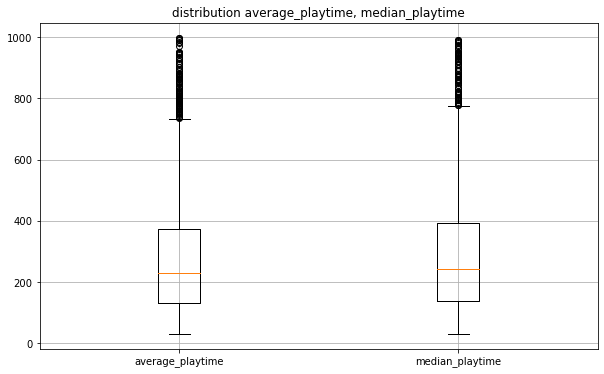

In [155]:
boxplot_population2(success_game_data, 'average_playtime', 'median_playtime')

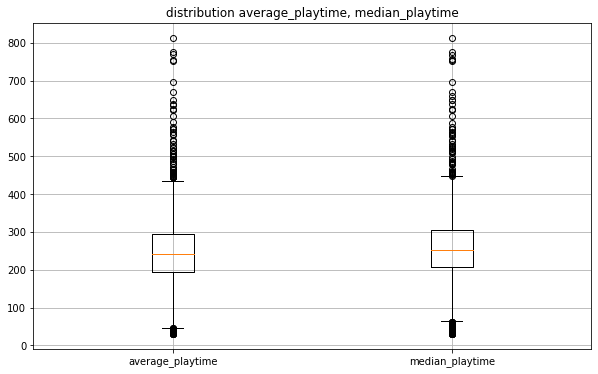

In [156]:
boxplot_population2(fail_game_data, 'average_playtime', 'median_playtime')

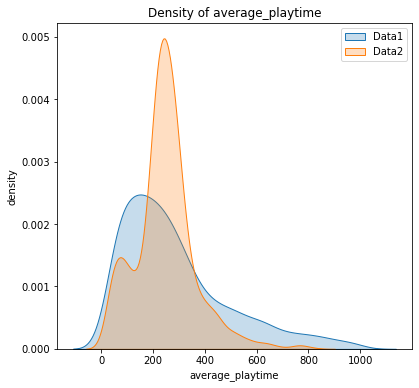

In [157]:
density_population3(success_game_data, fail_game_data, 'average_playtime')

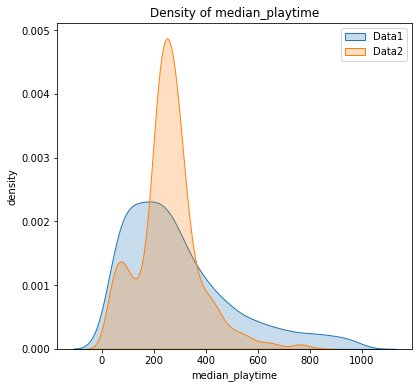

In [158]:
density_population3(success_game_data, fail_game_data, 'median_playtime')

In [159]:
# t-test 진행
alter_list = ['two-sided', 'less', 'greater']

for alter in alter_list:
    result = do_ttest1(success_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest1(fail_game_data, 'average_playtime', 'median_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'average_playtime', alter)
    
    print(result)

print("----------------------")

for alter in alter_list:
    result = do_ttest2(success_game_data, fail_game_data, 'median_playtime', alter)

    print(result)

Ttest_indResult(statistic=-1.4219968010877264, pvalue=0.1551127049274129)
Ttest_indResult(statistic=-1.4219968010877264, pvalue=0.07755635246370644)
Ttest_indResult(statistic=-1.4219968010877264, pvalue=0.9224436475362935)
----------------------
Ttest_indResult(statistic=-1.6803638705930855, pvalue=0.09305017352469142)
Ttest_indResult(statistic=-1.6803638705930855, pvalue=0.04652508676234571)
Ttest_indResult(statistic=-1.6803638705930855, pvalue=0.9534749132376543)
----------------------
Ttest_indResult(statistic=6.168710134342233, pvalue=7.891254535340604e-10)
Ttest_indResult(statistic=6.168710134342233, pvalue=0.9999999996054373)
Ttest_indResult(statistic=6.168710134342233, pvalue=3.945627267670302e-10)
----------------------
Ttest_indResult(statistic=6.1576086067349785, pvalue=8.457464980088582e-10)
Ttest_indResult(statistic=6.1576086067349785, pvalue=0.9999999995771268)
Ttest_indResult(statistic=6.1576086067349785, pvalue=4.228732490044291e-10)


### 가설검정(t-test) 결과
- 모두 p-value가 0.05보다 작으므로 유의미한 차이가 있다는 결론이 나옴
- 실패 비율을 정하고 진행하고, 범위를 낮췄더니 시각화에도 좋음
- 실패한 게임들은 평균 게임플레이 시간보다 중간 게임플레이 시간이 더 큰 것으로 나타났다.